<a href="https://colab.research.google.com/github/NSR-Ribeiro/aulaspython_vespertino/blob/aula5_tarde/Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Gráfico com seaborn, Plotly gerando HTML para o Flask



1.  Alô Mundo
2.  Carregar o Dataset
3.  Criar os top_10
4.  Criar um gráfico no Seaborn
5.  Criar um gráfico interativo
6.  Salvar em html
7.  Criar uma aplicação flask com o Gráfico
8.  Uso de GPT
9.  Avaliações e Faltas









In [171]:
print("Hello Word!")

Hello Word!


In [170]:
import pandas as pd

In [169]:
# df = pd.read_csv('/content/imigrantes_canada.csv')

url = 'https://raw.githubusercontent.com/romulosilvestre/datasets-semanaestastitica/main/imigrantes_canada.csv'

df = pd.read_csv(url)

In [168]:
df.head()

,Total
País,
Brasil,10000
Índia,15000
China,12000
Rússia,8000
Estados Unidos,20000


<Axes: xlabel='País', ylabel='Total'>

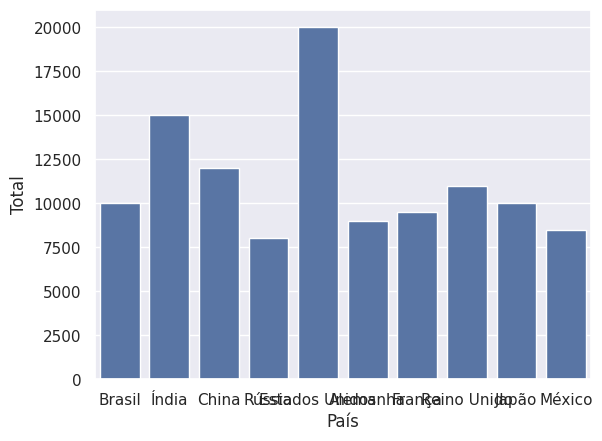

In [167]:
import seaborn as sns

sns.barplot(x="País",y="Total", data= df.head(20))

In [80]:
df.set_index('País',inplace = True)

In [166]:
df.head(10)

,Total
País,
Brasil,10000
Índia,15000
China,12000
Rússia,8000
Estados Unidos,20000
Alemanha,9000
França,9500
Reino Unido,11000
Japão,10000


In [81]:
top_10 = df.sort_values(by='Total',ascending=False).head(10)

[Text(0.5, 1.0, 'Os dez países com mais imigrantes para o Canadá'),
 Text(0.5, 0, 'Total de Imigrantes'),
 Text(0, 0.5, '')]

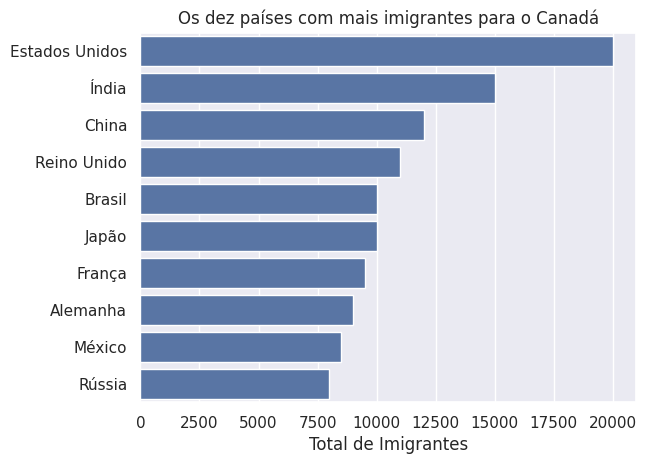

In [165]:
ax = sns.barplot(data=top_10,y=top_10.index,x='Total',orient='h')
ax.set(
    title='Os dez países com mais imigrantes para o Canadá',
    xlabel='Total de Imigrantes',
    ylabel=''
)

In [164]:
import matplotlib.pyplot as plt

In [138]:
def gerar_grafico_paleta(pallete):
  fig,ax = plt.subplots(figsize=(8,4))
  ax = sns.barplot(data=top_10,y=top_10.index,x='Total',
                 orient='h',
                 palette=pallete)
  ax.set_title('Os dez países com mais imigrantes para o Canadá',
             loc='left',
             fontsize=16)
  ax.set_xlabel('Total de Imigrantes',fontsize=14)
  ax.set_ylabel('')
  plt.show()

<ipython-input-138-5916e0ffb2dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10,y=top_10.index,x='Total',


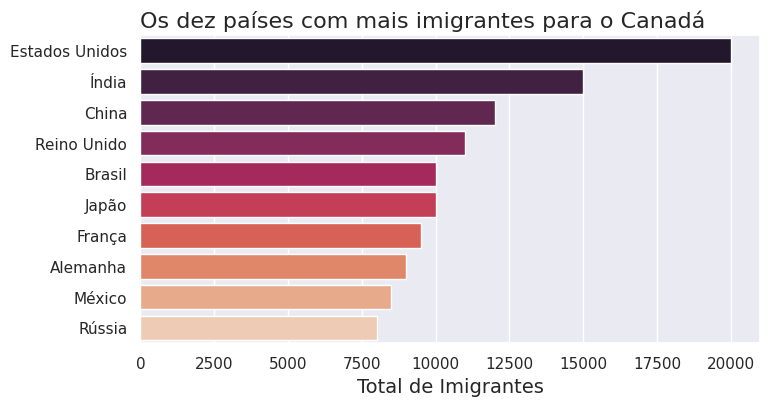

In [163]:
gerar_grafico_paleta('rocket')



In [141]:
## Gráfico Interativo com Plotly

In [160]:
import plotly.express as px

In [173]:
anos =list(map(str,range(1980,2014)))

In [174]:
brasil = df.loc['Brasil', anos]

KeyError: 'Brasil'

In [176]:
brasil_dict = {'ano': brasil.index.tolist(),'imigrantes':brasil.values.tolist()}


In [155]:
dados_brasil = pd.DataFrame(brasil_dict)

In [175]:
dados_brasil.head()

,ano,imigrantes
0,Total,10000
